### Part 1 :Exploratory Data Analysis(EDA) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline



In [63]:
# %pip install KoNLPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 7.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 KB 12.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
data = pd.read_csv('/Users/shasha/Desktop/YDS/Mini Project/Fastcampus Dataset/파이널프로젝트_RAW_210329_210926.csv')

In [4]:
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00


In [5]:
data.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [6]:
data['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

'데이터 사이언스' 와 '데이터사이언스' 는 동일한 값임에도 띄어쓰기로 구분되어있어 통일이 필요하다.

In [7]:
data['category_title'].replace(['데이터 사이언스'], ['데이터사이언스'], inplace= True)

In [8]:
data['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '비즈니스', '지식콘텐츠', '일러스트', '파이낸스'],
      dtype=object)

다음은 NaN값을 확인해보자.

In [9]:
data[ data['category_title'].isnull() ]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
9002,996843,490139.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,480000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
9003,996793,490089.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
9004,996842,490138.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
9005,996851,490149.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
12133,1011200,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-04-12 11:40:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaN
12181,1006736,291328.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-12 13:10:10,967000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
13754,1012747,498414.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-15 20:40:35,170000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
31192,1063323,524510.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-10 18:04:33,35000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
36367,1066932,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-05-17 16:12:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaN
38944,1093777,539708.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-22 10:57:39,127500,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN


course_title을 통해 유추가 가능한 카테고리는 채워넣도록 하자.

In [10]:
data.loc[(data.category_title.isnull()) & (data.course_title.str.contains('데이터 사이언티스트')) , 'category_title' ] = '데이터사이언스'
data.loc[(data.category_title.isnull()) & (data.course_title.str.contains('영상편집')) , 'category_title' ] = '영상/3D'

# /var/folders/5m/xcyhgrds42ggf8pjt9v4bs2h0000gn/T/ipykernel_38082/3831763023.py:1: SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame

# See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# data[ (data['category_title'].isnull()) & (data['course_title'].str.contains('데이터 사이언티스트') ) ]['category_title'].fillna('데이터사이언스', inplace=True)

In [11]:
data[ data['category_title'].isnull() ]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
9002,996843,490139.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,480000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
9003,996793,490089.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
9004,996842,490138.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
9005,996851,490149.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-07 15:05:06,600000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
12133,1011200,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-04-12 11:40:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaN
12181,1006736,291328.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-12 13:10:10,967000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
13754,1012747,498414.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-04-15 20:40:35,170000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
31192,1063323,524510.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-10 18:04:33,35000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
36367,1066932,NaN,NaN,TRANSACTION,COMPLETED,NaN,NaN,NaN,2021-05-17 16:12:00,0,NaN,NaN,NaN,NaN,NaN,B2B_CONTRACT,NaN,NaN
38944,1093777,539708.0,NaN,PAYMENT,DELETED,NaN,NaN,NaN,2021-05-22 10:57:39,127500,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN


In [12]:
data.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               17
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

자유이용권은 올인원 패키지 2개를 선택하여 소장할 수 있는 이용권 이라고 한다. 1건 이므로 삭제하기로 한다.

In [13]:
data.dropna(subset=['category_title'], inplace=True)

In [14]:
data.isnull().sum()

id                            0
customer_id                   0
course_id                  5190
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              73585
coupon_discount_amount    73585
sale_price                 1112
tax_free_amount            1112
pg                        15058
method                    13096
subcategory_title         19812
marketing_start_at        17962
dtype: int64

카테고리별 서머리를 확인해보도록 하자.

패스트캠퍼스의 환불규정은 수강시작 후 7일이내 100% 차감이며, 수강을 했다면 그 분량만큼 차감이 된다. 따라서 Sales Price와 동일하게 100% 환불이 되었다면 강의 퀄리티와 관계없이 

강의를 전혀 수강하지 않은 단순변심으로 인한 환불이라고 할 수 있다.

SALES에 초점을 맞춰서 보기위해 100% Refund 인 case는 지우고 보도록 해보자.

In [15]:
data['transaction_amount'].isnull().any()

False

In [16]:
data['price_diff'] = data['transaction_amount'] + data['sale_price']

In [17]:
data[data['price_diff'] == 0]

# 100% 환불이 이루어져서 sale + transaction 합이 0원이 되는 케이스

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,price_diff
672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 9:44:01,-340000,NaN,NaN,340000.0,340000.0,NaN,VBANK,NaN,2021-03-08 0:00:00,0.0
675,972436,456086.0,NaN,REFUND,COMPLETED,프로모션 :연봉 앞자리가 바뀌는 프론트엔드 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-29 9:47:17,-299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN,0.0
779,972701,478091.0,NaN,REFUND,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-29 10:33:27,-299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN,0.0
805,972756,275343.0,202589.0,REFUND,COMPLETED,합격 패스 : ADsP,데이터사이언스,올인원,2021-03-29 10:39:47,-59000,NaN,NaN,59000.0,59000.0,NaN,CARD,NaN,2020-06-19 0:00:00,0.0
821,972792,286965.0,201997.0,REFUND,COMPLETED,올인원 패키지 : Android 앱 개발,프로그래밍,올인원,2021-03-29 10:44:47,-99000,NaN,NaN,99000.0,99000.0,NaN,CARD,모바일앱,2020-01-04 0:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105109,1363371,6215.0,204649.0,REFUND,COMPLETED,The RED : 칼만필터를 활용한 자율주행 센서퓨전 기술 구현 by 조형기,데이터사이언스,RED,2021-09-24 11:48:36,-249000,NaN,NaN,249000.0,249000.0,INICIS,CARD,딥러닝/인공지능,2021-07-02 0:00:00,0.0
105137,1363569,30366.0,206419.0,REFUND,COMPLETED,"올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리",데이터사이언스,올인원,2021-09-24 13:38:36,-218000,NaN,NaN,218000.0,218000.0,INICIS,CARD,딥러닝/인공지능,NaN,0.0
105168,1363704,670215.0,204670.0,REFUND,COMPLETED,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,마케팅,RED,2021-09-24 14:32:43,-171000,NaN,NaN,171000.0,171000.0,NAVER,TRANS,글쓰기/카피라이팅,2021-06-18 17:00:00,0.0
105175,1363721,645911.0,NaN,REFUND,COMPLETED,프로모션 : 콘텐츠 마케터 맥북 air 패스(9월 현물 프리패스),마케팅,올인원,2021-09-24 14:41:35,-1400000,NaN,NaN,1400000.0,251600.0,INICIS,CARD,NaN,NaN,0.0


In [18]:
all_refund = data[data['price_diff'] == 0].index
data.drop(all_refund, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103319 entries, 0 to 105418
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      103319 non-null  int64  
 1   customer_id             103319 non-null  float64
 2   course_id               98297 non-null   float64
 3   type                    103319 non-null  object 
 4   state                   103319 non-null  object 
 5   course_title            103319 non-null  object 
 6   category_title          103319 non-null  object 
 7   format                  103319 non-null  object 
 8   completed_at            103319 non-null  object 
 9   transaction_amount      103319 non-null  int64  
 10  coupon_title            31817 non-null   object 
 11  coupon_discount_amount  31817 non-null   float64
 12  sale_price              102207 non-null  float64
 13  tax_free_amount         102207 non-null  float64
 14  pg                  

In [20]:
data[data['price_diff'] == 0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,price_diff


단순 변심 환불은 모두 삭제되었다. 이제 다른 컬럼의 결측치를 확인해보자.

In [21]:
data[data.sale_price.isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,price_diff
631,972364,478743.0,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 8:52:36,100000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN,NaN
633,972365,478745.0,203352.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 8:57:12,750000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN,NaN
1194,974008,479366.0,204129.0,PAYMENT,COMPLETED,(B2B) 주식회사 비바리즈 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 14:56:46,200000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN,NaN
1312,976595,480387.0,204486.0,PAYMENT,COMPLETED,(B2B) 웰컴금융그룹 온라인 구독 싱글 플랜,교육,B2B 온라인,2021-03-29 16:43:59,1194000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN,NaN
1458,984569,483121.0,204534.0,PAYMENT,COMPLETED,(B2B) (주)하나아이씨티 온라인 구독 올 플랜(추가) - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,390000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104831,1361297,669386.0,207667.0,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN,NaN
104832,1361312,669400.0,207555.0,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN,NaN
104905,1367252,672301.0,207714.0,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN,NaN
105163,1367258,672307.0,207731.0,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN,NaN


In [22]:
data.isnull().sum()

id                            0
customer_id                   0
course_id                  5022
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              71502
coupon_discount_amount    71502
sale_price                 1112
tax_free_amount            1112
pg                        14884
method                    13096
subcategory_title         19283
marketing_start_at        17464
price_diff                 1112
dtype: int64

In [23]:
data.drop(['price_diff'], axis=1 , inplace=True)

sale_price가 NaN 값인 경우에는 transaction 으로 값을 넣기로 하자.

In [24]:
data[data.sale_price.isnull()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
631,972364,478743.0,204039.0,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 8:52:36,100000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
633,972365,478745.0,203352.0,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 8:57:12,750000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
1194,974008,479366.0,204129.0,PAYMENT,COMPLETED,(B2B) 주식회사 비바리즈 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 14:56:46,200000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
1312,976595,480387.0,204486.0,PAYMENT,COMPLETED,(B2B) 웰컴금융그룹 온라인 구독 싱글 플랜,교육,B2B 온라인,2021-03-29 16:43:59,1194000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
1458,984569,483121.0,204534.0,PAYMENT,COMPLETED,(B2B) (주)하나아이씨티 온라인 구독 올 플랜(추가) - 비대면바우처,교육,B2B 온라인,2021-03-29 18:29:07,390000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104831,1361297,669386.0,207667.0,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
104832,1361312,669400.0,207555.0,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000,NaN,NaN,NaN,NaN,NaN,TRANSFER,NaN,NaN
104905,1367252,672301.0,207714.0,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN
105163,1367258,672307.0,207731.0,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000,NaN,NaN,NaN,NaN,NaN,ONSITE,NaN,NaN


In [25]:
data['sale_price'].fillna(data['transaction_amount'], inplace=True)
data['tax_free_amount'].fillna(data['transaction_amount'], inplace=True)

In [26]:
data.isnull().sum()

id                            0
customer_id                   0
course_id                  5022
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title              71502
coupon_discount_amount    71502
sale_price                    0
tax_free_amount               0
pg                        14884
method                    13096
subcategory_title         19283
marketing_start_at        17464
dtype: int64

In [27]:
data['coupon_discount_amount'].fillna(0 , inplace=True)
data['coupon_title'].fillna(0 , inplace=True)

In [28]:
data.isnull().sum()

id                            0
customer_id                   0
course_id                  5022
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title                  0
coupon_discount_amount        0
sale_price                    0
tax_free_amount               0
pg                        14884
method                    13096
subcategory_title         19283
marketing_start_at        17464
dtype: int64

쿠폰 사용 금액은 회사의 이익이 아니므로 제외하여 매출액을 살표보자.

In [29]:
data['sales'] = data['sale_price'] - data['coupon_discount_amount']

In [30]:
data2 = data.copy()

In [31]:
data.isnull().sum()

id                            0
customer_id                   0
course_id                  5022
type                          0
state                         0
course_title                  0
category_title                0
format                        0
completed_at                  0
transaction_amount            0
coupon_title                  0
coupon_discount_amount        0
sale_price                    0
tax_free_amount               0
pg                        14884
method                    13096
subcategory_title         19283
marketing_start_at        17464
sales                         0
dtype: int64

In [32]:
data2.drop(['transaction_amount', 'coupon_title', 'coupon_discount_amount', 'subcategory_title'], axis=1, inplace=True)

sales의 단위를 (천원) 으로 바꿔보자.

In [33]:

data2['sales'] = data2['sales'] * 0.001

In [34]:
data2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,110500.0,110500.0,NaN,VBANK,NaN,110.50
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,116000.0,116000.0,NaN,CARD,2020-12-02 0:00:00,116.00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,190900.0,190900.0,NaN,CARD,2021-03-04 0:00:00,171.81
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,190900.0,190900.0,NaN,CARD,2021-03-04 0:00:00,190.90
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,117500.0,117500.0,NaN,CARD,2019-11-14 0:00:00,97.50


State = 'Deleted' 삭제

In [35]:
deleted = data2[data2['state'] == 'DELETED'].index
data2.drop(deleted, inplace=True)

In [36]:
data2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,110500.0,110500.0,NaN,VBANK,NaN,110.50
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,116000.0,116000.0,NaN,CARD,2020-12-02 0:00:00,116.00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,190900.0,190900.0,NaN,CARD,2021-03-04 0:00:00,171.81
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,190900.0,190900.0,NaN,CARD,2021-03-04 0:00:00,190.90
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,117500.0,117500.0,NaN,CARD,2019-11-14 0:00:00,97.50


State = REQUESTED

In [37]:
data2[data2['state'] == 'REQUESTED']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
13438,1010903,496244.0,203996.0,PAYMENT,REQUESTED,매주)디지털 마케팅 온라인 완주반,마케팅,온라인 완주반,2021-04-15 7:53:02,589000.0,589000.0,INICIS,VBANK,2021-01-06 0:00:00,589.0
15246,1016838,500567.0,204172.0,PAYMENT,REQUESTED,올인원 패키지 : 바다가 알려주는 감성가득 영상 제작,영상/3D,올인원,2021-04-18 22:08:18,110000.0,110000.0,INICIS,VBANK,2021-03-19 0:00:00,90.0
18402,1027681,492153.0,202521.0,PAYMENT,REQUESTED,올인원 패키지 : 다빈치리졸브로 배우는 영상 색 보정 A to Z,영상/3D,올인원,2021-04-25 15:14:20,110500.0,110500.0,INICIS,CARD,2020-03-24 0:00:00,110.5
21778,1036523,485965.0,203498.0,PAYMENT,REQUESTED,초격차 패키지 : 한 번에 끝내는 엑셀 실무,업무 생산성,올인원,2021-04-28 17:28:57,107000.0,107000.0,INICIS,CARD,2020-12-18 0:00:00,107.0
22879,1039800,23638.0,205059.0,PAYMENT,REQUESTED,데이터분석 프로젝트+자격증 온라인 완주반 4기,데이터사이언스,온라인 완주반,2021-04-29 18:37:04,320000.0,320000.0,INICIS,CARD,2021-04-26 0:00:00,320.0
24941,1045325,511201.0,202072.0,PAYMENT,REQUESTED,올인원 패키지 : 코딩 첫 걸음 프로젝트,프로그래밍,올인원,2021-04-30 21:52:33,97500.0,97500.0,KAKAO,NaN,2020-01-23 0:00:00,87.5
25387,1046370,515158.0,204450.0,PAYMENT,REQUESTED,올인원 패키지 : 누적 조회수 12억! 우감독의 재미있는 영상 편집,영상/3D,올인원,2021-04-30 23:42:16,109000.0,109000.0,INICIS,VBANK,2021-04-22 0:00:00,109.0
30487,1061388,522284.0,NaN,PAYMENT,REQUESTED,프로모션 : 나의 디자인 DNA찾기! 디자인 무제한 99패스 (5월 프리패스),크리에이티브,올인원,2021-05-09 22:55:21,199000.0,199000.0,INICIS,CARD,NaN,199.0
30806,1062209,523924.0,203525.0,PAYMENT,REQUESTED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-05-10 11:32:42,113500.0,113500.0,KAKAO,NaN,2021-02-01 0:00:00,113.5
31146,1063077,524426.0,202551.0,PAYMENT,REQUESTED,올인원 패키지 : 프로젝트와 함께 배우는 R 데이터 분석,데이터사이언스,올인원,2021-05-10 17:36:48,136000.0,136000.0,INICIS,CARD,2020-04-07 0:00:00,136.0


What is the definition of a payment request?

A payment request is a hyperlink, sent to a buyer by a seller. The hyperlink redirects the buyer to a secure checkout, where he or she makes the requested payment. The customer fills in their card details in the checkout and pays for the desired service or product.


REQUESTED는 취소로 봐도 될까?

In [38]:
# data2[data2['state'] == 'REQUESTED'] = 'COMPLETED'

In [39]:
data2['state'].value_counts()

COMPLETED    60676
CANCELLED    41279
PENDING       1144
REQUESTED       14
Name: state, dtype: int64

Pending 1144 건중 3건만이 CARD이고 나머지는 전부 VBANK였다.

In [40]:
data2[(data2['state'] == 'PENDING')  &  (data2['method'] == 'CARD')]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
1739,975251,460326.0,204013.0,PAYMENT,PENDING,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-03-29 22:25:54,169000.0,169000.0,NaN,CARD,2021-03-16 0:00:00,149.0
2540,977421,480663.0,200486.0,PAYMENT,PENDING,올인원 패키지 : 모두를 위한 SQL/DB,데이터사이언스,올인원,2021-03-30 16:24:04,122000.0,122000.0,NaN,CARD,2019-04-04 0:00:00,122.0
7322,991419,461466.0,203720.0,PAYMENT,PENDING,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-04 21:15:19,113000.0,113000.0,NaN,CARD,2021-02-02 0:00:00,113.0


In [41]:
data2[data2['customer_id'] == 460326]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
1739,975251,460326.0,204013.0,PAYMENT,PENDING,올인원 패키지 : 완전정복 시각디자인 기초,디자인,올인원,2021-03-29 22:25:54,169000.0,169000.0,NaN,CARD,2021-03-16 0:00:00,149.0
1741,975255,460326.0,203523.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-03-29 22:26:56,164000.0,164000.0,NaN,CARD,2020-12-18 0:00:00,144.0
1742,975253,460326.0,203523.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,디자인,올인원,2021-03-29 22:26:56,164000.0,164000.0,NaN,CARD,2020-12-18 0:00:00,164.0
1768,975310,460326.0,201547.0,PAYMENT,COMPLETED,올인원 패키지 : 구글 애널리틱스,마케팅,올인원,2021-03-29 22:40:36,108500.0,108500.0,NaN,PROMOTION,NaN,-37.5


In [42]:
data2[data2['customer_id'] == 480663]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
2540,977421,480663.0,200486.0,PAYMENT,PENDING,올인원 패키지 : 모두를 위한 SQL/DB,데이터사이언스,올인원,2021-03-30 16:24:04,122000.0,122000.0,NaN,CARD,2019-04-04 0:00:00,122.0


In [43]:
data2[data2['customer_id'] == 461466]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,sale_price,tax_free_amount,pg,method,marketing_start_at,sales
7310,991384,461466.0,201083.0,PAYMENT,COMPLETED,올인원 패키지 : 딥러닝/인공지능,데이터사이언스,올인원,2021-04-04 21:07:08,171000.0,171000.0,NaN,CARD,2019-07-04 0:00:00,141.0
7318,991409,461466.0,202612.0,PAYMENT,COMPLETED,올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문,데이터사이언스,올인원,2021-04-04 21:13:54,171000.0,171000.0,NaN,CARD,2020-04-27 0:00:00,141.0
7321,991418,461466.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-04 21:15:19,113000.0,113000.0,NaN,CARD,2021-02-02 0:00:00,113.0
7322,991419,461466.0,203720.0,PAYMENT,PENDING,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-04 21:15:19,113000.0,113000.0,NaN,CARD,2021-02-02 0:00:00,113.0
22148,1037723,461466.0,201760.0,PAYMENT,COMPLETED,올인원 패키지 : Node 웹 프로그래밍,프로그래밍,올인원,2021-04-28 23:38:08,99000.0,99000.0,NaN,PROMOTION,2020-02-27 0:00:00,-14.0
22156,1037743,461466.0,201997.0,PAYMENT,COMPLETED,올인원 패키지 : Android 앱 개발,프로그래밍,올인원,2021-04-28 23:52:33,100000.0,100000.0,NaN,PROMOTION,2020-01-04 0:00:00,-41.0


In [44]:
# data2[data2['state'] == 'PENDING'] = 'COMPLETED' 'CANCELLED'
# data2[data2['state'] == 'REQUESTED'] = 'CANCELLED'

STATE 컬럼 정리 (Completed, REQUESTED 만 남기기)

In [45]:
deleted = data2[data2['state'] == 'PENDING'].index
data2.drop(deleted, inplace=True)

In [46]:
data2['state'].unique()


array(['CANCELLED', 'COMPLETED', 'REQUESTED'], dtype=object)

In [47]:
deleted = data2[data2['state'] == 'CANCELLED'].index
data2.drop(deleted, inplace=True)

In [48]:
data2.state.unique()

array(['COMPLETED', 'REQUESTED'], dtype=object)

STATE 컬럼 수치로 변경

In [49]:
data2.loc[data2['state'] == 'REQUESTED', 'state' ] = 0
data2.loc[data2['state'] == 'COMPLETED', 'state' ] = 1

시각화

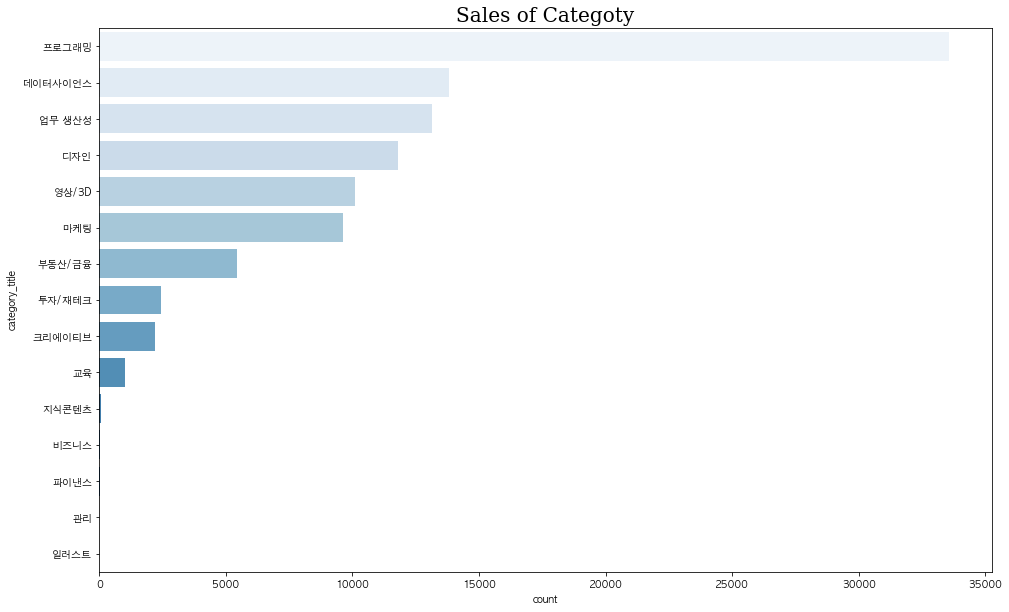

In [50]:
plt.figure(figsize=(16, 10))
sns.countplot(y="category_title",data=data , order = data.category_title.value_counts().index,palette="Blues",linewidth=3)
plt.title("Sales of Categoty",font="Serif", size=20)
plt.show()

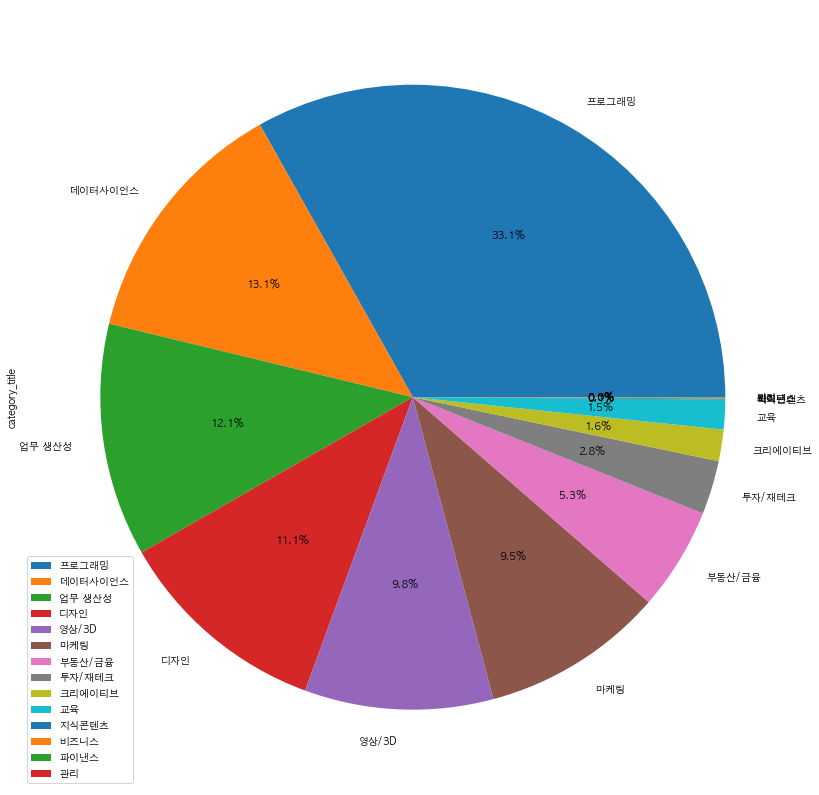

In [51]:
data2["category_title"].value_counts().head(15).plot(kind = 'pie', autopct='%1.1f%%',figsize=(14, 18), startangle=0).legend();

(-0.5, 1439.5, 1079.5, -0.5)

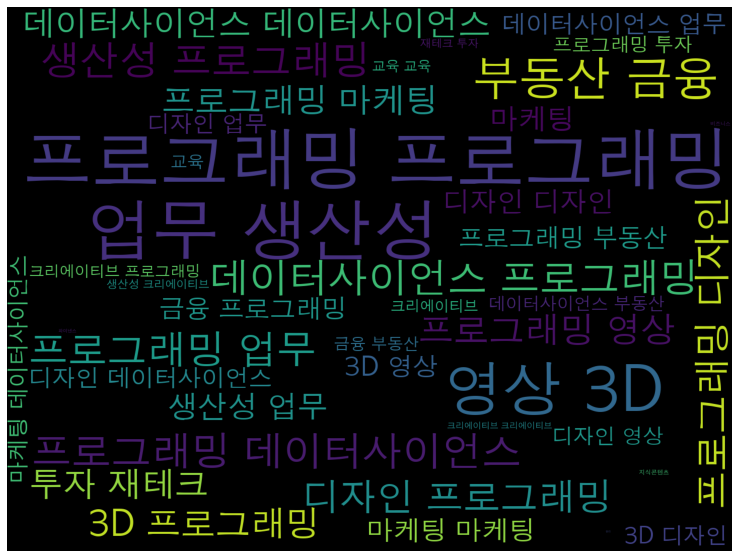

In [60]:

cloud = WordCloud(width=1440, height=1080,stopwords={'nan'}, font_path='/Library/Fonts/AppleGothic.ttf' ).generate(" ".join(data2['category_title'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [71]:
words = (" ".join(data2['category_title']))

In [74]:
test = pd.Series(words)

In [76]:
test.to_csv('test.txt', index = False , header = None, sep = '\t')

(-0.5, 1439.5, 1079.5, -0.5)

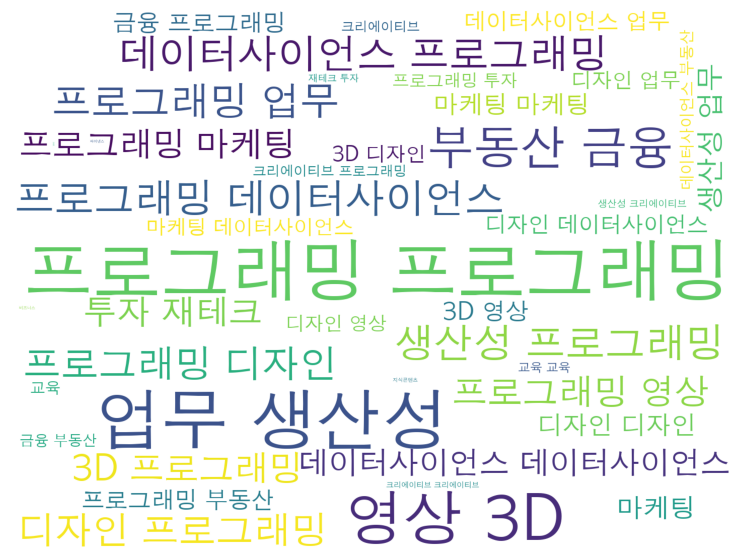

In [87]:
wc = WordCloud(width=1440, height=1080,stopwords={'nan'}, font_path='/Library/Fonts/AppleGothic.ttf', background_color='white' )

wc.generate(words)
plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis('off')

In [104]:
# from collections import Counter

f = open('/Users/shasha/Desktop/YDS/Mini Project/Fastcampus Dataset/test.txt', 'r', encoding='utf-8')

count = Counter(f.read().split())

print(count)

Counter({'프로그래밍': 20112, '데이터사이언스': 7940, '업무': 7318, '생산성': 7318, '디자인': 6746, '영상/3D': 5924, '마케팅': 5742, '부동산/금융': 3226, '투자/재테크': 1689, '크리에이티브': 988, '교육': 932, '지식콘텐츠': 33, '비즈니스': 22, '파이낸스': 17, '관리': 1})


In [98]:
# from wordcloud import WordCloud
# from konlpy.tag import Twitter
# from collections import Counter

In [ ]:


# open으로 txt파일을 열고 read()를 이용하여 읽는다.
text = open('/Users/shasha/Desktop/YDS/Mini Project/Fastcampus Dataset/test.txt', 'r', encoding='utf-8').read()

twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(text) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(1000) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(20, 15))
plt.axis('off')
plt.imshow(cloud)
plt.show()

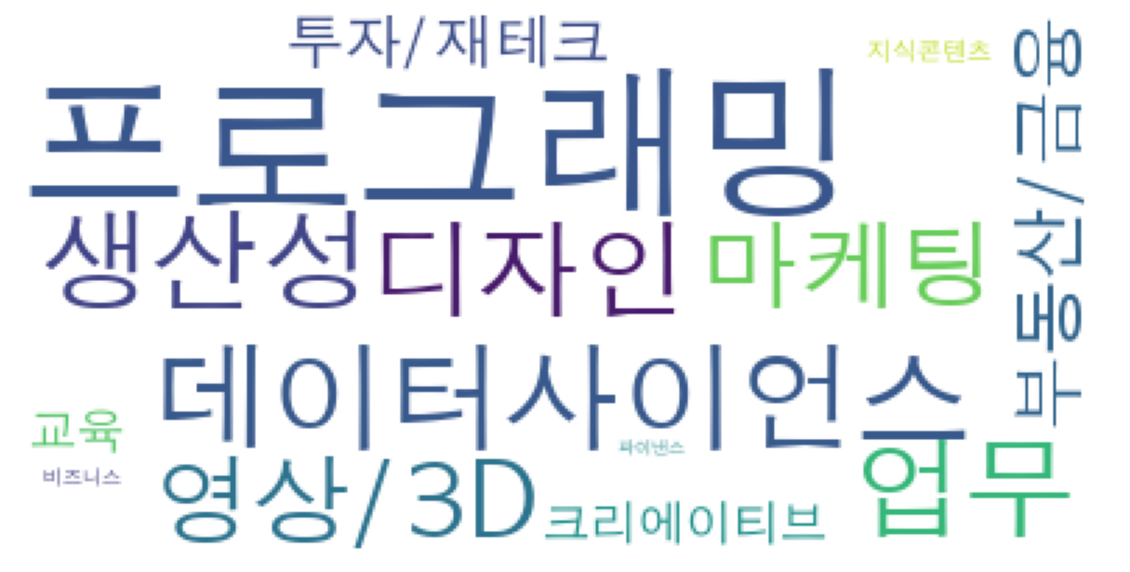

In [106]:

wc = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(count))

plt.figure(figsize=(20, 15))
plt.axis('off')
plt.imshow(cloud)
plt.show()